# Activation Functions Used in NN
In class, we mentioned two activation functions for NN: we talked about the step function and the sigmoid function. There are several activation functions popularly used for NN.
Here are plots for several of them:

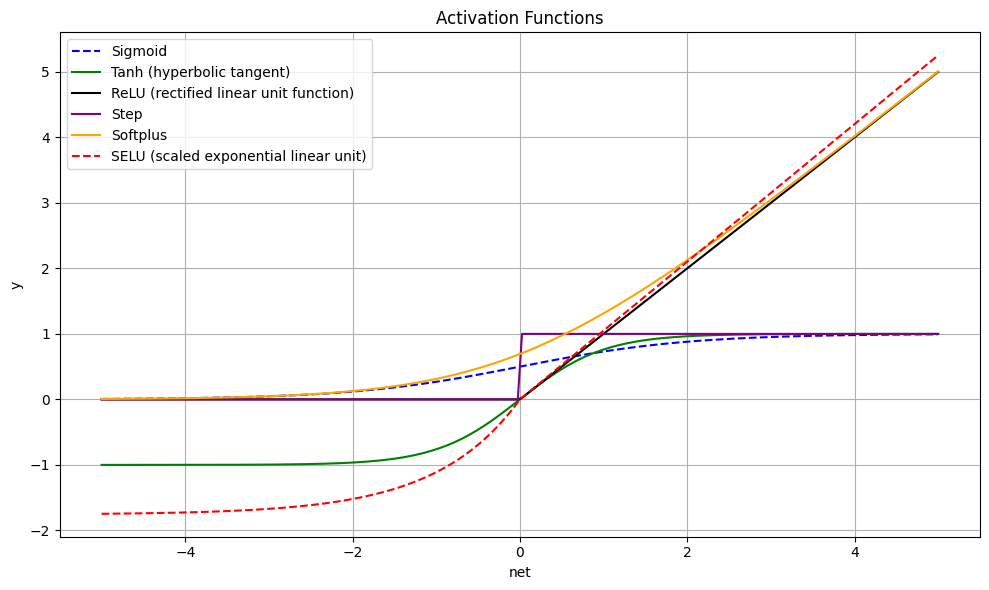

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))         # sigma(z) = 1 / (1 + exp(-z))

def tanh(x):
    return np.tanh(x)                   # tanh(z) = 2 sigma(2 z) -1

def relu(x):
    return np.maximum(0, x)             # ReLU(z) = max(0,z)

def step(x):
    return np.where(x >= 0, 1, 0)       # step(z) = { 1 if z >=0
                                        #           { 0 if z < 0

def softplus(x):
    return np.log(1 + np.exp(x))        # softplus(z) = log(1 + exp(z))

def selu(x, alpha=1.67326, scale=1.0507):
    return scale * np.where(x > 0, x, alpha * (np.exp(x) - 1))    # SELU(z) = { scale z                , if z >=0 where scale=1.0507
                                                                  #           { scale alpha (exp(z)-1) , if z < 0 where alpha=1.67326 and scale=1.0507

# Create a range of values for x
x = np.linspace(-5, 5, 200)

# Compute the corresponding y values for each activation function
y_sigmoid = sigmoid(x)
y_tanh = tanh(x)
y_relu = relu(x)
y_step = step(x)
y_softplus = softplus(x)
y_selu = selu(x)

# Plot all activation functions on one graph with different styles
plt.figure(figsize=(10, 6))

plt.plot(x, y_sigmoid, label='Sigmoid', linestyle='dashed', color='blue')
plt.plot(x, y_tanh, label='Tanh (hyperbolic tangent)', linestyle='solid', color='green')
plt.plot(x, y_relu, label='ReLU (rectified linear unit function)', linestyle='solid', color='black')
plt.plot(x, y_step, label='Step', linestyle='solid', color='purple')
plt.plot(x, y_softplus, label='Softplus', linestyle='solid', color='orange')
plt.plot(x, y_selu, label='SELU (scaled exponential linear unit)', linestyle='dashed', color='red')

plt.legend()
plt.title('Activation Functions')
plt.grid(True)
plt.xlabel('net')
plt.ylabel('y')

plt.tight_layout()
plt.show()


This is a bit cluttered; you may want to comment out some lines to see them more clearly individually.

## NN Regression Common Practices
For regression problems (where the output is a predicted number, rather than a classification among labels), you may not want to use activation functions like the step function **in the output layer,** as that would limit each output node's result to either 0 or 1. So, *for regression,* you may prefer the ReLU activation or the softplus activation, so you may get actual numbers. If you don't want to limit the output nodes' results to just positive numbers, you may use the hyperbolic tangent (note that you would have to scale the training data to be between -1 and 1). Indeed if you do not wish to limit the output to any range, you may eliminate the activation function **in the output layer nodes** altogether.

<u>Common Practices using NN for **Regression:**</u>

*   Activation function for hidden layers: ReLU or SELU
*   Activation function for output layer: if positive output constraints, then ReLU or SELU, or if bounded output constraints, then hyperbolic tangent, or if no output constraints, then none.
*   one input node per feature (plus a bias input node)
*   typically 1 to 5 hidden layers
*   typically between 10 to 100 nodes per hidden layer
*   one output neuron per prediction dimension (so, for example, if your NN is trying to find the center of an object in an image, then you'll need to predict one value for the horizontal coordinate and another one for the vertical coordinate: that means two output nodes)







## NN Multiclass Classification Common Practices
For classification problems, you will have one output node for each classification label (so, we need $c$ output nodes... the ouput layer doesn't need a bias node).

Here, the result for each **output** node endeavors to approximate the probability that this feature vector is associated to a specific label. That mean that the ouput will be a number between 0 and 1.

For example, if your NN tries to classify a picture between a snake, a cat, and a bird, then an input feature vector showing a long, skinny animal without legs should output something close to 1 for the **output** node labeled "snake", and something close to 0 for the other two **output** nodes for labels "cat" and "bird."

<u>Common Practices using NN for Multiclass Classification</u>
*   Activation function for hidden layers: ReLU
*   Activation function for output layer: softmax
*   one input node per feature (plus a bias input node)
*   typically 1 to 5 hidden layers
*   typically between 10 to 100 nodes per hidden layer
*   one output node per class label





***
Let's import some data to work with. We'll import a very popular set of 70,000 small grayscale pictures of handwritten digits. Each picture is 28 x 28 pixels (that's 784 features, where each feature represents that pixel's intensity in grayscale, from 0 for black to 255 for white). In this code we'll load the data, and split it into training and testing data. For reasons which will become apparent later, we'll limit ourselves to working only with the first 6,000 instances.

In [ ]:
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(X_tr, y_tr), (X_tst, y_tst) = mnist.load_data()  # already split into training set and test set

#We're going to randonly shuffle the data
N_train = X_tr.shape[0]
indices = np.random.permutation(N_train)

# Shuffle both X_train and y_train using the same set of indices
X_train = X_tr[indices]
y_train = y_tr[indices]

# Now, for the testing data
N_test = X_tst.shape[0]
indices = np.random.permutation(N_test)

# Shuffle both X_train and y_train using the same set of indices
X_test = X_tst[indices]
y_test = y_tst[indices]

############################
# For reasons that will become apparent later, we'll only retain 10% of the data for training our NN (at this time)
X_train=X_train[0:6000]
y_train=y_train[0:6000]
###########################

# Print the shapes of the feature matrix and label vector
print("X shape:", X_train.shape)
print("y shape:", y_train.shape)

X shape: (6000, 28, 28)
y shape: (6000,)


Let's take a look at one of these digits.

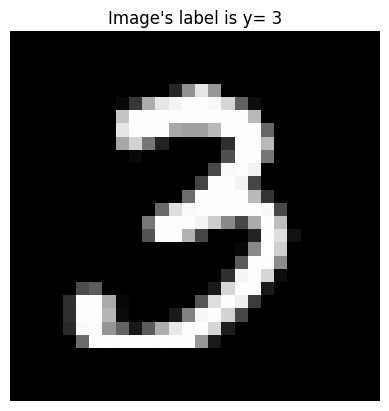

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Plot the fifth image from the training set (index 4) and print its label
image_index = 4
plt.imshow(X_train[image_index].reshape(28, 28), cmap='gray')
plt.title(f"Image's label is y= {y_train[image_index]}")
plt.axis('off')
plt.show()


We'll import the Keras library from tensorflow to create a NN with ten hidden layers, where each hidden layer has forty nodes. The hidden nodes will use the ReLU activation function and the output layer will use the softmax activation function.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

# Preprocess the data  ( scale it  from 0 to 1, and convert it to float type)
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0
y_train = to_categorical(y_train, num_classes=10)  # ten digits from 0 to 9
y_test = to_categorical(y_test, num_classes=10)

# Create a neural network model
model = Sequential()                          #  simplest kind of Keras model for NN (single stack of nodes connected sequentially)

# Add the input layer (Flatten layer)
model.add(Flatten(input_shape=(28, 28, 1)))   # Each input feature has a shape of 28x28 pixels ("flatten" means turn each square array into a 1-D feature vector, x)

# Add ten hidden layers with 40 nodes each and ReLU activation (it automatically adds the bias node for all pertinent layers)
for _ in range(10):
    model.add(Dense(40, activation='relu'))

# Add the output layer with softmax activation (10 classes or labels for MNIST)
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='KLDivergence', metrics=['accuracy']) # The Adam optimizer (Adaptive Moment Estimation)
                                                                           # is a popular optimization algorithm used for training neural networks.
                                                                           # We'll talk about the KL-Divergence when we talk about Decision Trees.
                                                                           # "accuracy" is a commonly used metric for classification tasks and is a
                                                                           # measure of how well your model correctly predicts the class labels of the input data.

# Print the model summary with the number of weights (trainable parameters)
model.summary()                               # A "dense layer" is a type of layer that connects each neuron or unit in the layer to every neuron in the previous layer.
                                              # We called it a fully connected layer.

# Let's look at the weight for the first hidden layer
first_hidden_layer = model.layers[1]  # Index 1 corresponds to the first hidden layer (0-indexed)

# Get the weights for the first hidden layer
weights, biases = first_hidden_layer.get_weights()

# Determine the number of weights
num_weights = weights.size

# Print the number of weights (this number should be 784 features x 10 nodes = 7840)
print("Number of weights in the first hidden layer:", num_weights)

# Print the weights
print("Weights for the first hidden layer are:")
print(weights)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 40)                31400     
                                                                 
 dense_1 (Dense)             (None, 40)                1640      
                                                                 
 dense_2 (Dense)             (None, 40)                1640      
                                                                 
 dense_3 (Dense)             (None, 40)                1640      
                                                                 
 dense_4 (Dense)             (None, 40)                1640      
                                                                 
 dense_5 (Dense)             (None, 40)                1

Now, we need to train the NN. Be patient! This may take a while. If you get bored and step away, you may have to refresh the run (Colab forget importing libraries and data if it idles for a while): just click on "Runtime" in the menu abovem and select "Restart session and run all".

In [ ]:
# Train our model
history = model.fit(X_train, y_train, epochs=15, batch_size=64, validation_split=0.2)
                                      # one epoch = one complete pass through the entire training set (where the model updates its weights based on the training data to minimize the loss function)
                                      # batch_size = how many samples are used in each update of the model's weights. Larger batches provide more stable updates to the calculation of w's because
                                      #              it averages the gradients over a batch of samples. This can speed up training by taking advantage of parallelism in modern hardware
                                      #              (e.g., GPUs) and can reduce the impact of noisy data.
                                      # validation_split = This parameter splits a fraction of the training data (in this example, 20%) into a validation data set, which is used to monitor
                                      #                    the model's performance during training.



Epoch 1/15
75/75 [==============================] - 8s 9ms/step - loss: 1.5747 - accuracy: 0.4290 - val_loss: 0.9421 - val_accuracy: 0.6825
Epoch 2/15
75/75 [==============================] - 0s 6ms/step - loss: 0.6389 - accuracy: 0.7927 - val_loss: 0.5823 - val_accuracy: 0.8383
Epoch 3/15
75/75 [==============================] - 0s 5ms/step - loss: 0.4066 - accuracy: 0.8781 - val_loss: 0.4801 - val_accuracy: 0.8600
Epoch 4/15
75/75 [==============================] - 0s 5ms/step - loss: 0.2866 - accuracy: 0.9175 - val_loss: 0.4714 - val_accuracy: 0.8658
Epoch 5/15
75/75 [==============================] - 0s 5ms/step - loss: 0.2577 - accuracy: 0.9258 - val_loss: 0.4992 - val_accuracy: 0.8525
Epoch 6/15
75/75 [==============================] - 0s 5ms/step - loss: 0.1945 - accuracy: 0.9435 - val_loss: 0.5144 - val_accuracy: 0.8675
Epoch 7/15
75/75 [==============================] - 0s 6ms/step - loss: 0.1599 - accuracy: 0.9504 - val_loss: 0.4074 - val_accuracy: 0.8983
Epoch 8/15
75/75 [==

Now that our NN is trained and ready to run, let's see the learning curves for the loss and the accuracy. Recall that the accuracy is measured as

$$
accuracy=\frac{number~of~all~correctly~classified~feature~vectors}{number~of~all~feature~vectors}
$$

 We'll plot the learning curves for the training and validation sets.

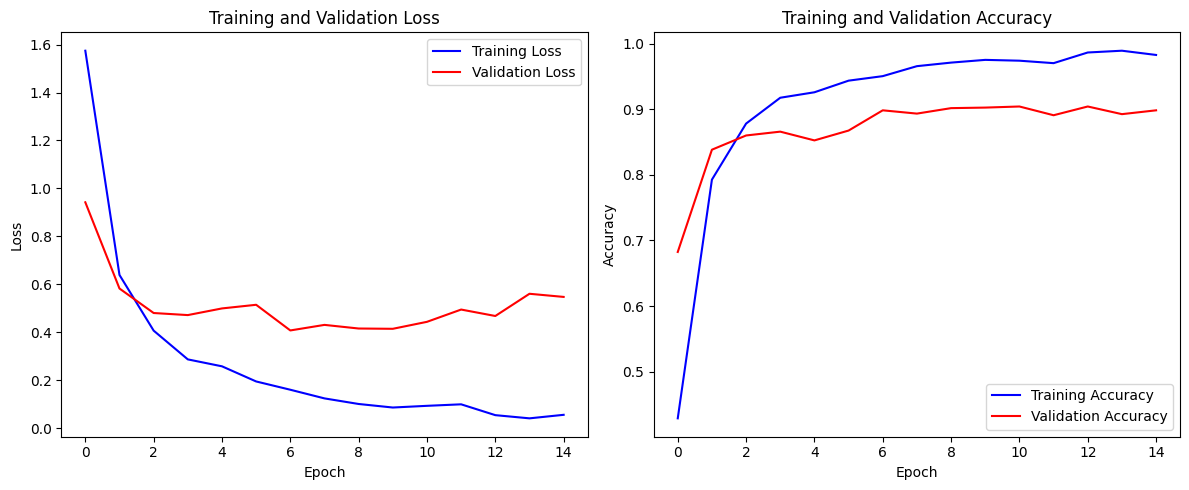

In [ ]:
# Extract training and validation loss
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Extract training and validation accuracy
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Create subplots for loss and accuracy
plt.figure(figsize=(12, 5))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(training_loss, label='Training Loss', color='blue')
plt.plot(validation_loss, label='Validation Loss', color='red')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(training_accuracy, label='Training Accuracy', color='blue')
plt.plot(validation_accuracy, label='Validation Accuracy', color='red')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In the following code, we'll see how the classifier performed on the test data set compared to the training data set.

Also, we'll look under the hood to see what made the algorithm decide correctly and incorrectly. We'll use the test data to separate the correct decisions from the incorrect ones and then look at the estimate of the posteriori probabilities, $z_i$ (the results of the output nodes), for each case.

In [ ]:
# Calculate test loss and accuracy using your actual test data and labels
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

# Print training & test loss and accuracy
print("Test data loss:", test_loss)
print("Training data loss = ", training_loss[-1])
print("Test data accuracy:", test_accuracy)
print("Training data accuracy = ", training_accuracy[-1])
print("\n")

y_pred = model.predict(X_test)                          # Obtaining the z_i for the test data

pred_labels = np.argmax(y_pred, axis=1)                 # Convert predicted z_i to class labels
true_labels = np.argmax(y_test, axis=1)                 # Convert true test t_i to class labels

###############################
# Compare predicted labels to true labels to find misclassified examples
wrong_indices = np.where(pred_labels != true_labels)[0] # Find misclassified instances

wrong_index = wrong_indices[0]                          # Select the first misclassified instance

true_t_i = y_test[wrong_index]                          # find the true t_i for the misclassified instance

true_label = true_labels[wrong_index]                    # find the true label for the misclassified instance

wrong_label = pred_labels[wrong_index]                  # find the incorrectly predicted label for the same misclassified instance

output_probabilities = y_pred[wrong_index]              # find the z_i for all classes for the misclassified instance

print("\n Firstly, let's look at a misclassified test instance \n ====================================================")
print(f"True t_i: {true_t_i}")
print(f"True label: {true_label}")
print(f"Incorrectly Predicted Label: {wrong_label}")
print("Output z_i:")
for class_label, probability in enumerate(output_probabilities):
    print(f"Class {class_label}: {probability:.4f}")


###############################
# Compare predicted labels to true labels to find correctly classified examples
right_indices = np.where(pred_labels == true_labels)[0] # Find correctly classified instances

right_index = right_indices[0]                          # Select the first correctly classified instance

true_t_i = y_test[right_index]                          # find the true t_i for the correctly classified instance

true_label = true_labels[right_index]                   # find the true label for the correctly classified instance

right_label = pred_labels[right_index]                  # find the correctly correctly predicted label for the same instance

output_probabilities = y_pred[right_index]              # find the z_i for all classes for the correctly classified instance

print("\n Secondly, let's look at a correctly classified test instance \n =================================================================")
print(f"True t_i: {true_t_i}")
print(f"True label: {true_label}")
print(f"Predicted Label: {right_label}")
print("Output z_i:")
for class_label, probability in enumerate(output_probabilities):
    print(f"Class {class_label}: {probability:.4f}")




Test data loss: 0.450806200504303
Training data loss =  0.055283427238464355
Test data accuracy: 0.9099000096321106
Training data accuracy =  0.9827083349227905


313/313 [==============================] - 1s 3ms/step

 Firstly, let's look at a misclassified test instance 
True t_i: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
True label: 8
Incorrectly Predicted Label: 4
Output z_i:
Class 0: 0.0000
Class 1: 0.0000
Class 2: 0.0000
Class 3: 0.0000
Class 4: 0.5094
Class 5: 0.0001
Class 6: 0.0000
Class 7: 0.0001
Class 8: 0.4751
Class 9: 0.0153

 Secondly, let's look at a correctly classified test instance 
True t_i: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
True label: 9
Predicted Label: 9
Output z_i:
Class 0: 0.0000
Class 1: 0.0000
Class 2: 0.0000
Class 3: 0.0000
Class 4: 0.0000
Class 5: 0.0000
Class 6: 0.0000
Class 7: 0.0000
Class 8: 0.0000
Class 9: 1.0000


***
***

## For this project, we'll change the architecture of the neural net and see how that affects the performance.

The nerural network architecture didn't result in very favorable learning curves, did it?

The validation data loss was much higher than the training data loss, and the validation data accuracy was much lower than the training data accuracy. This suggests that our classifier is suffering from **high variance** (it is overfitting).

To mitigate high variance, we have a few tools we can implement:

*   We can reduce the complexity of our classifier (that means fewer layers and also fewer nodes in each layer)
*   We can add regularization (in our course, we have used **L2** regularization)
*   We can increase the amount of data (in the code above, we limited ourselves to only using the first 6000 training instances, instead of all 60,000)

Problem 1 [3 points]
Please, implement one or more of the modifications listed above to reduce the classifier's variance.

Problem 2 [2 points]
Please, make sure you explain in the space below
*   What specific changes did you make?
*   How do you know that there is less variance with this (these) modification(s)?





